In [4]:
#!pip install tweepy

In [447]:
# !pip install visJS2jupyter

In [448]:
# !pip install py2cytoscape

In [449]:
# !pip install networkx

In [85]:
from matplotlib import pyplot as plt
%matplotlib notebook

In [18]:
import networkx as nx

In [19]:
from visJS2jupyter import visJS_module

In [357]:
import pandas as pd
import numpy as np

In [51]:
from collections import Counter

In [ ]:
import tweepy

In [444]:
import keys

In [445]:
consumer_key = keys.consumer_key
consumer_secret = keys.consumer_secret
access_token = keys.access_token
access_token_secret = keys.access_token_secret

In [446]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

### Test API

In [11]:
# Using the API object to get tweets from your timeline, and storing it in a variable called public_tweets
public_tweets = api.home_timeline(count=5)
# foreach through all tweets pulled
for i,tweet in enumerate(public_tweets):
   # printing the text stored inside the tweet object
   print i,tweet.text

0 You have a choice to make in moments of conflict. Here's how to get angry without being stupid: https://t.co/2GU5GHe4sk #leadership
1 During my trip to Saudi Arabia, I spoke to the leaders of more than 50 Arab &amp; Muslim nations about the need to conf… https://t.co/BYdTMUEWcd
2 RT @SenJohnMcCain: Must-read @washingtonpost: "#Cambodia’s ruthless leader is stepping up his authoritarian game" https://t.co/jGjujkcxPO
3 RT @Fahrenthold: I've reached out to all 12 charities designated to receive @realdonaldtrump's donations. Will update you when the $ arrive…
4 Together, we will show the world that the forces of destruction and extremism are NO MATCH for the BLESSINGS of PRO… https://t.co/kkzKdGIZlp


In [450]:
# tweet._json

OK it works!

## Q: can we get 1 month of home tweets?

In [176]:
# start_date = "2017-08-01"
ht1wk=api.home_timeline(count=200)
last_id = ht1wk[-1].id
while True:
    t=api.home_timeline(count=200, max_id=last_id-1)
    if not t:
        break
    last_id = t[-1].id
    ht1wk.extend(t)
    print len(ht1wk)

399
599
799
811


In [177]:
len(ht1wk)

811

In [178]:
latest = ht1wk[0]

In [179]:
latest.created_at

datetime.datetime(2017, 9, 8, 23, 47, 8)

In [180]:
oldest = ht1wk[-1]

In [181]:
oldest.created_at

datetime.datetime(2017, 8, 5, 19, 15, 22)

## Q: let's look at Donald Trupm (DT) account

In [22]:
r=api.search_users("realDonaldTrump")

In [23]:
r[0].screen_name

u'realDonaldTrump'

In [24]:
dt=r[0]

In [25]:
dt.description

u'45th President of the United States of America\U0001f1fa\U0001f1f8'

### Q: Let's get his latest tweet

In [47]:
dt_tweets=api.user_timeline(dt.screen_name)

In [49]:
dt_latest_tweet = dt_tweets[0]

In [53]:
dt_latest_tweet.text

u'During my trip to Saudi Arabia, I spoke to the leaders of more than 50 Arab &amp; Muslim nations about the need to conf\u2026 https://t.co/BYdTMUEWcd'

In [60]:
dt_latest_tweet.favorite_count

16918

In [61]:
dt_latest_tweet.retweet_count

4429

In [64]:
rt=dt_latest_tweet.retweets()

In [66]:
rt[0].author.screen_name

u'DubeAnjle'

### Q: Let's look at his followers

In [50]:
f=dt.followers()

In [51]:
len(f)

20

In [52]:
print [i.screen_name for i in f]

[u'canino007', u'Jose38017984', u'90Calleja', u'BlowinbandzY', u'6ZmaXTSssGMHNFL', u'FxImperium', u'Torben74', u'MohamedAli66602', u'XO43NxQ25SSyTRP', u'MarksmanCarrysU', u'xo_booms', u'JhoemPobar', u'ElenaDo71694062', u'marizhang66', u'Kaled18635131', u'TWNHmex', u'DixieHanson18', u'JcUtLxvKqt7nfNc', u'EmilyGalaxia', u'qhewjzte583']


In [58]:
dt.followers_count

37781972

### Q: Let's look at Barack Obama (BO)

In [226]:
r=api.search_users("BarackObama")

In [227]:
r[0].screen_name

u'BarackObama'

In [231]:
bo=r[0]

In [232]:
bo.description

u'Dad, husband, President, citizen.'

In [233]:
bo.followers_count

94595673

In [234]:
bo.followers_count/dt.followers_count

2

### Q: Can we visualize the timeline as histograms of number of tweets per user? 

In [182]:
a=Counter([t.author.screen_name for t in ht1wk])

a.most_common()

[(u'realDonaldTrump', 278),
 (u'SenSanders', 95),
 (u'SenWarren', 88),
 (u'fashionistatalk', 86),
 (u'HenryJEvans', 86),
 (u'kellymcevers', 79),
 (u'StephenAtHome', 29),
 (u'HillaryClinton', 20),
 (u'elizabethforma', 19),
 (u'astorino_steven', 10),
 (u'BarackObama', 8),
 (u'ShahriarSh', 7),
 (u'JZarif', 6)]

In [183]:
d=pd.DataFrame(a.items(), columns=["screen_name","tweet_count"])

In [184]:
d.set_index("screen_name", inplace=True)

In [185]:
d.sort_values(by="tweet_count", inplace=True)

<IPython.core.display.Javascript object>


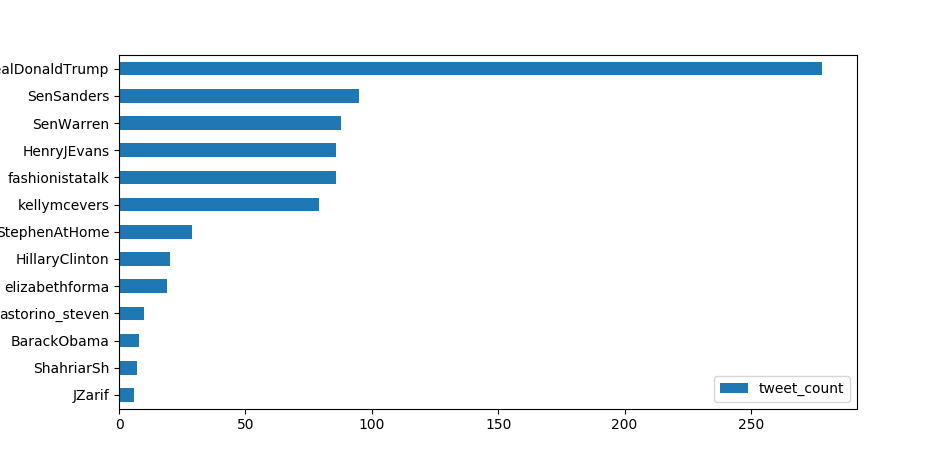

In [186]:
d.plot.barh(y="tweet_count");

### Q: transform the tweeter data format to DataFrame for easier analysis

In [452]:
# latest.__dict__

In [144]:
use_fields = ["id","created_at", "favorite_count","retweet_count","retweeted","user.screen_name","user.followers_count",
              "text"]

In [187]:
df=pd.DataFrame([[eval("t."+c) for c in use_fields] for t in ht1wk], columns=use_fields).set_index("id")

### Top most liked tweets

In [451]:
df.sort_values(by="favorite_count", ascending=False).head(5)

,created_at,favorite_count,retweet_count,retweeted,user.screen_name,user.followers_count,text
id,,,,,,,
896523232098078720,2017-08-13 00:06:09,4590167,1707297,False,BarackObama,94589040,"""No one is born hating another person because ..."
898261944095789056,2017-08-17 19:15:11,1631429,324677,False,BarackObama,94589040,Michelle and I are thinking of the victims and...
896523304873238528,2017-08-13 00:06:27,1587579,502624,False,BarackObama,94589040,"""People must learn to hate, and if they can le..."
896523357272911872,2017-08-13 00:06:39,1417239,415697,False,BarackObama,94589040,"""...For love comes more naturally to the human..."
905141484386750469,2017-09-05 18:52:01,910297,387807,False,BarackObama,94589039,To target hopeful young strivers who grew up h...


### Q: plot favorite_count as a time series for specific users

<IPython.core.display.Javascript object>


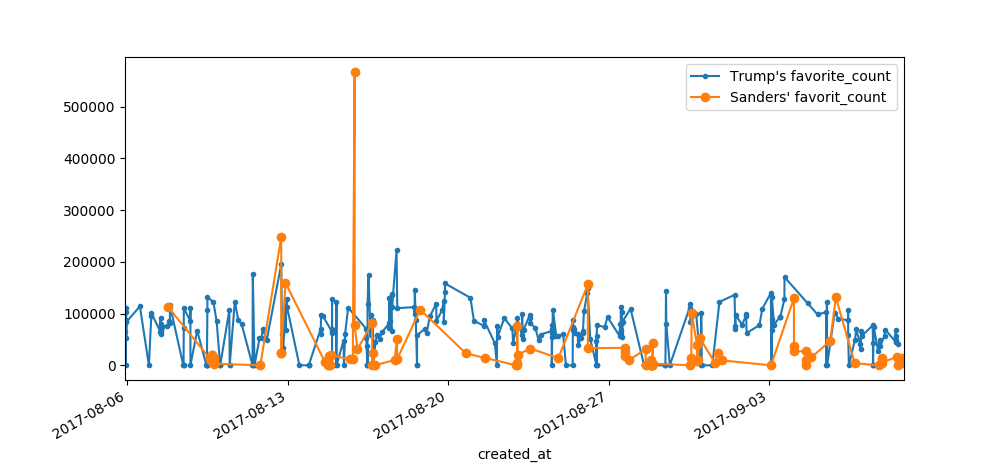

In [190]:
ax=df.loc[df["user.screen_name"]=="realDonaldTrump"].set_index("created_at").plot(y="favorite_count",marker='.')
df.loc[df["user.screen_name"]=="SenSanders"].set_index("created_at").plot(y="favorite_count", marker='o',ax=ax)
ax.legend(["Trump's favorite_count","Sanders' favorit_count"])

### Q: Who has the most number of followers?

In [191]:
g=df[["user.screen_name","user.followers_count"]].groupby("user.screen_name").max().sort_values("user.followers_count")

<IPython.core.display.Javascript object>


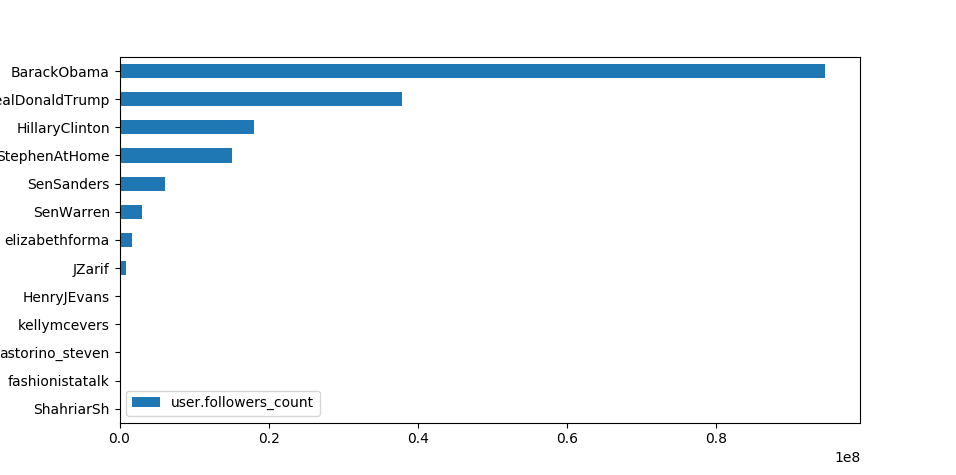

In [192]:
g.plot.barh()

#### Log Scale

<IPython.core.display.Javascript object>


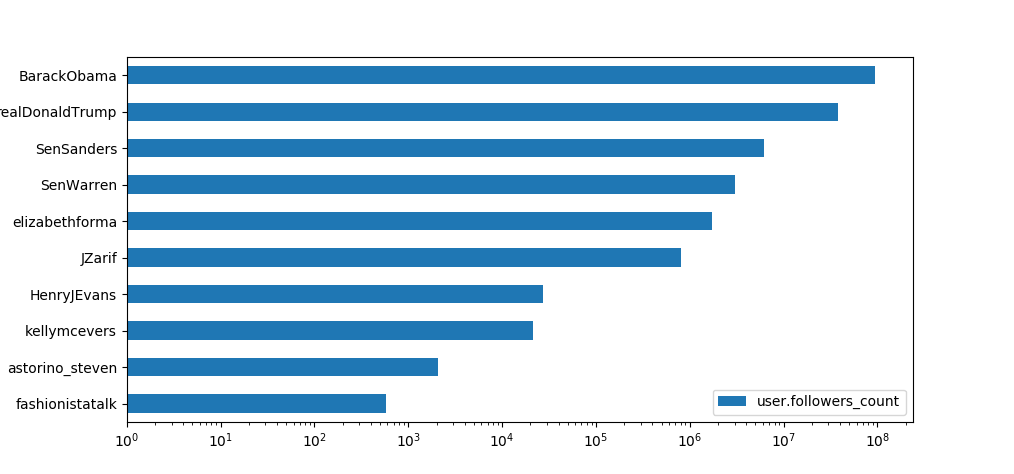

In [162]:
g.plot.barh(log=True)

### Q: create a directed graph of users (nodes: authors, edges: following)

In [266]:
import matplotlib as mpl
import networkx as nx
import visJS2jupyter.visJS_module

In [327]:
users={i.id:i for i in api.friends()}

In [328]:
g=nx.DiGraph()

In [329]:
g.add_nodes_from(users)

In [330]:
g.nodes()

[1916120257,
 16303106,
 970207298,
 813286,
 87823144,
 29442313,
 46541122,
 2238324110,
 40815629,
 47813521,
 1339835893,
 357606935,
 1926683448,
 104673756,
 2176745083,
 197574940,
 25073877]

In [396]:
user_list=g.nodes()
for n in np.random.permutation(user_list):
    if g.edges(n):
        continue
    fl=users[n].followers()
    fr=users[n].friends()
    new_users={i.id:i for i in fl+fr}
    users.update(new_users)
    g.add_nodes_from(new_users)
    print "Num. users:", len(g.nodes())
    g.add_edges_from([(n,i.id) for i in fl])
    g.add_edges_from([(i.id,n) for i in fr])

Num. users: 358
Num. users: 371
Num. users: 389
Num. users: 405
Num. users: 425
Num. users: 454
Num. users: 472
Num. users: 488
Num. users: 507
Num. users: 530
Num. users: 570
Num. users: 605


RateLimitError: [{u'message': u'Rate limit exceeded', u'code': 88}]

In [391]:
# u.friends()

In [397]:
users[n].screen_name

u'AungTinWin4684'

In [398]:
user_list=users#g.nodes()
i=0
j=0
for n in user_list:
    #print n,
    if g.edges(n):
        #print "yes"
        i+=1
    else:
        #print "no"
        j+=1

print "yes:",i
print "no:",j


yes: 281
no: 324


In [399]:
len(g.edges())

654

In [400]:
len(g.nodes())

605

### Q: Analyse betweenness.

In [401]:
# G=nx.connected_watts_strogatz_graph(30,5,.2)
# nodes = G.nodes()
# edges = G.edges()

# # define the initial positions of the nodes using networkx's spring_layout function, and add to the nodes_dict.
# pos = nx.spring_layout(G)
# nodes_dict = [{"id":n,
#               "x":pos[n][0]*1000,
#               "y":pos[n][1]*1000} for n in nodes]
# node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

# edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
#               "title":'test'} for i in range(len(edges))]

# visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict)

In [402]:
# # create a simple graph
# G1 = nx.connected_watts_strogatz_graph(30,5,.2)
# nodes1 = G1.nodes()
# edges1 = G1.edges()

In [403]:
# create a simple graph
G1 = g #nx.connected_watts_strogatz_graph(30,5,.2)
nodes1 = G1.nodes()
edges1 = G1.edges()

In [404]:
p=nx.spring_layout(G1)

In [406]:
# cc = nx.clustering(G1)

In [407]:
degree = G1.degree()

In [408]:
bc = nx.betweenness_centrality(G1)

##### betweenness_centrality
Compute the shortest-path betweenness centrality for nodes.

Betweenness centrality of a node `v` is the sum of the
fraction of all-pairs shortest paths that pass through `v`

math:

   $$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$$

where $V$ is the set of nodes, $\sigma(s, t)$ is the number of
shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of those
paths  passing through some  node `v` other than `s, t`.
If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$,
$\sigma(s, t|v) = 0$.

In [409]:
# sorted(nx.eigenvector_centrality(G1).items(),key=lambda x:x[1], reverse=True)

In [430]:
df_bc=pd.DataFrame(data=[(users[i].screen_name, b) for i,b in sorted(bc.items(),key=lambda x:x[1], reverse=True)],
                   columns = ["screen_name","betweenness_score"]).set_index("screen_name")
                   

In [431]:
df_bc.head()

,betweenness_score
screen_name,
savvyyabby,0.002593
Biz_flow,0.002251
DrBobbyS,0.001194
lkcckl441,0.001117
Kgomots04775940,0.000806


### Q: Who has the highest betweenness score?

<IPython.core.display.Javascript object>


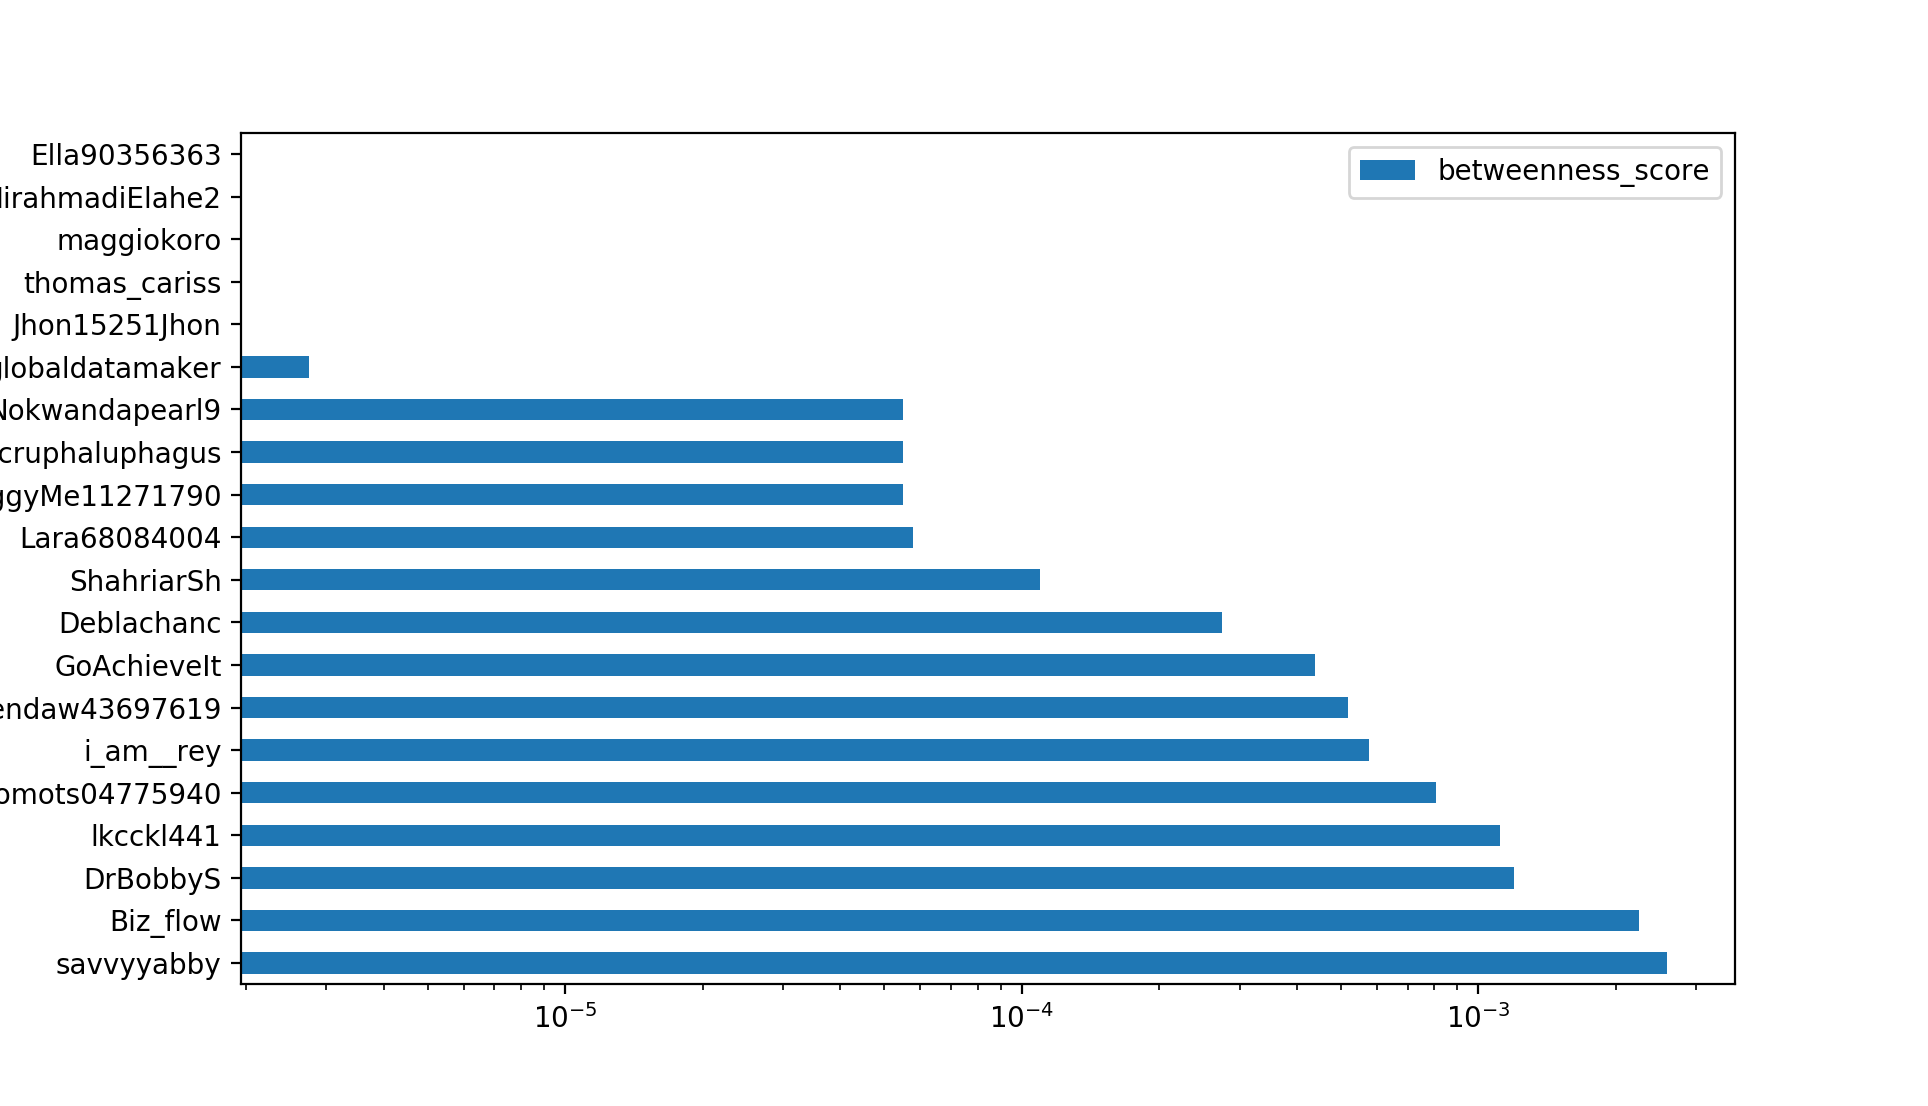

In [433]:
df_bc.head(20).plot.barh(y="betweenness_score", log=True)

In [414]:
#nx.set_node_attributes(G1,'clustering_coefficient',cc)
nx.set_node_attributes(G1,'degree',degree)

In [435]:
bc_log={k:np.log(v) for (k,v) in bc.items()}

In [454]:
nx.set_node_attributes(G1,'betweenness_centrality',bc)

In [455]:
# map the betweenness centrality to the node color, using matplotlib spring_r colormap
node_to_color = visJS2jupyter.visJS_module.return_node_to_color(G1,field_to_map='betweenness_centrality',
                                                                cmap=mpl.cm.spring_r,alpha = 1,
                                                 color_max_frac = .9,color_min_frac = .1)

# set node initial positions using networkx's spring_layout function
pos = nx.spring_layout(G1)

nodes_dict1 = [{"id":users[n].screen_name,"color":node_to_color[n],
               "degree":np.log(users[n].followers_count), #nx.degree(G1,n),
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000
               } for n in nodes1
              ]
node_map1 = dict(zip(nodes1,range(len(nodes1))))  # map to indices for source/target in edges
edges_dict1 = [{"source":node_map1[edges1[i][0]], "target":node_map1[edges1[i][1]], 
              "color":"gray","title":'test'} for i in range(len(edges1))]

In [456]:
# set some network-wide styles
visJS2jupyter.visJS_module.visjs_network(nodes_dict1,edges_dict1,
                          node_size_multiplier=5,node_size_transform = '',
                          node_color_highlight_border='red',node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',node_color_hover_background='#8BADD3',
                          node_font_size=25,edge_arrow_to=True,physics_enabled=True,edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',edge_width=3,max_velocity=15,min_velocity=1)